In [5]:
# WRITTEN BY ALAN LI
# NASA AMES LABORATORY FOR ADVANCED SENSING (LAS)
# Last edited: Nov 8, 2017

import sys
sys.path.append("./utils/") # Adds higher directory to python modules path.
import random
import numpy as np
import cv2
import loadcoraldata_utils as coralutils
import glob, os

from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
from collections import Counter
import pandas as pd
import logging
from PIL import Image as pil_image

import keras
from keras.models import Model, Sequential, load_model
from keras.layers import Input, Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, Convolution2D, MaxPooling2D
from keras.layers.convolutional import ZeroPadding2D
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras import optimizers
from keras.preprocessing.image import img_to_array
from keras.callbacks import Callback
from NeMO_models import FCN
import NeMO_layers

%matplotlib notebook

model = load_model('./tmp/fcn_vgg16_model.h5', custom_objects={'BilinearUpSampling2D':NeMO_layers.BilinearUpSampling2D})

Using TensorFlow backend.


In [3]:
transect1_path = '../Images/Transect 1 Hi-Res.tiff'
transect1_truth_path = '../Images/Transect 1 Truth data.tif'

image_size = 150
labels = ('Sand', 'Branching', 'Mounding', 'Rock')
Transect1 = coralutils.CoralData(transect1_path, Truthpath=transect1_truth_path, Testpath = transect1_path, truth_key=[16,160,198,38], PIL_load=True)
#Transect1.load_image(transect1_path, PILflag = True)
Transect1.set_depth(254.0)

# fcn_vgg16 = FCN(input_shape=(224, 224, 3), classes=21, weight_decay=3e-3, weights='imagenet', trainable_encoder=True)
#model = load_model('./tmp/fcn_vgg16_model.h5', custom_objects={'BilinearUpSampling2D':NeMO_layers.BilinearUpSampling2D})

whole_predict, num_predict, truth_predict, accuracy = Transect1.predict_on_whole_image(model, image_size = 150, num_lines=None, spacing = (25,25))

In [4]:
whole_predict_map = np.copy(whole_predict.astype(np.float32))
whole_predict_map[whole_predict_map == 0] = -1
whole_predict_map = ((whole_predict_map+1)*255/4).astype(np.uint8)
whole_predict_map = cv2.applyColorMap(whole_predict_map, cv2.COLORMAP_JET)
cv2.imwrite('NeMOFCN_visual.png',whole_predict_map)
print(accuracy)

92.7812759791


In [9]:
### GONNA TRY SOME TEST CODE
labels = ('Sand', 'Branching', 'Mounding', 'Rock')
labelrandom = random.randint(0,3)
numrandom = random.randint(0,49)
labelrandom = 'Sand'
numrandom = 128
#filestr = labels[labelrandom] + '_' + str(numrandom).zfill(8) + '.png'
filestr = labelrandom + '_' + str(numrandom).zfill(8) + '.png'
print('File: ', filestr)

image1_path = '../Images/Training_Patches/' + filestr
image1_truth_path = '../Images/TrainingRef_Patches/' + filestr

image1 = []
tempimage = pil_image.open(image1_path)
image1.append(img_to_array(tempimage))
originalimage = cv2.imread(image1_path)
b,g,r = cv2.split(originalimage)
originalimage = cv2.merge((r,g,b))
truthimage = cv2.imread(image1_truth_path)
truthimagemap_gray = cv2.cvtColor(cv2.imread(image1_truth_path), cv2.COLOR_BGR2GRAY)

#pixel_mean = np.asarray([127,127,127], dtype=np.float)
# pixel_std = np.asarray([127,127, 127], dtype=np.float)
image_size = 150
image1 = np.asarray(image1, dtype=np.float)
image1[0] = image1[0] - 127.0
image1[0] = image1[0]/127.0


predict = model.predict_on_batch(image1)
predict = np.argmax(predict,-1)

labelkey =[0,63,127,191]
if labelkey is not None:
    item_counter = 0
    for item in labelkey:
        truthimagemap_gray[truthimagemap_gray == item ] = item_counter 
        item_counter+=1

train_generator = datagen.flow_from_NeMOdirectory(train_loader.image_dir,
    target_size=(y,x),
    color_mode='8channel',
    classes = PerosBanhos.class_labels,
    class_mode = 'categorical',
    batch_size = 72,
    shuffle=True)

class_indices_rev = dict((v,k) for k,v in train_generator.class_indices.items()) #flip k,v
print(class_indices_rev)

Found 48000 images belonging to 24 classes, split into 24 consolidated classes.
{0: 'NoData', 1: 'back reef - pavement', 2: 'back reef - rubble dominated', 3: 'back reef - sediment dominated', 4: 'back reef coral framework', 5: 'Beach', 6: 'Clouds', 7: 'coralline algal ridge (reef crest)', 8: 'deep fore reef slope', 9: 'deep lagoonal water', 10: 'deep ocean water', 11: 'dense seagrass meadows', 12: 'fore reef sand flats', 13: 'Inland waters', 14: 'lagoonal floor - barren', 15: 'lagoonal fringing reefs', 16: 'lagoonal patch reefs', 17: 'lagoonal sediment apron - sediment dominated', 18: 'mangroves', 19: 'Rocky beach', 20: 'shallow fore reef slope', 21: 'shallow fore reef terrace', 22: 'terrestrial vegetation', 23: 'Wetlands'}


{0: 'Other', 1: 'Pavement with algae', 2: 'Rubble with CCA', 3: 'Sediment bare', 4: 'Seagrass', 5: 'Rock', 6: 'Reef crest', 7: 'Low Relief HB', 8: 'High Relief HB', 9: 'Patch reefs'}
(900, 1200)


<IPython.core.display.Javascript object>


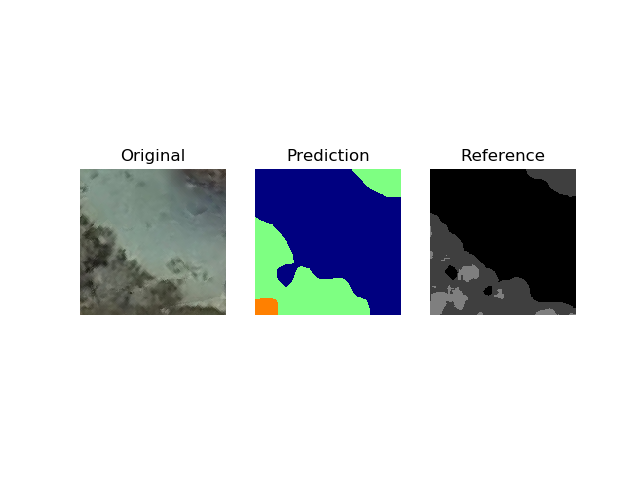

<IPython.core.display.Javascript object>


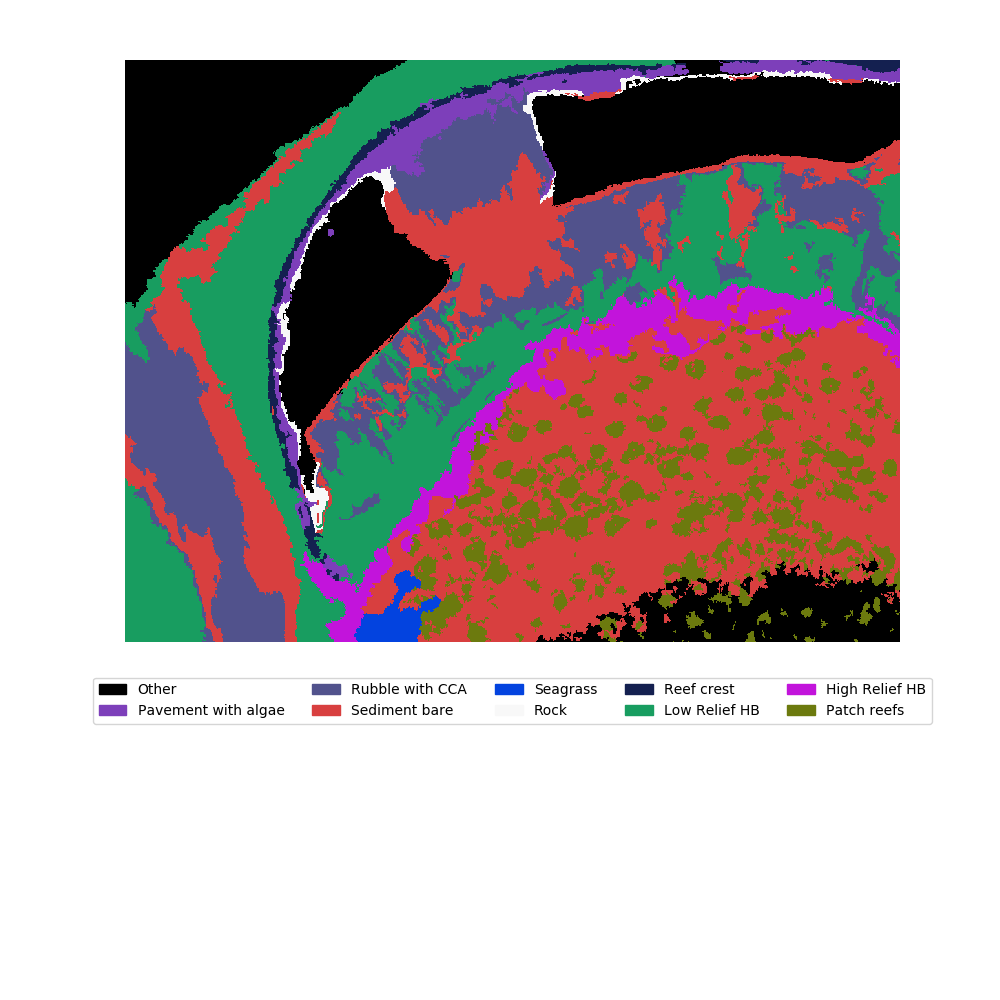

In [12]:
xstart = 400
xlen = 1200
ystart = 400
ylen = 900

predict_size = 150
PerosBanhos.testimage = PerosBanhos.image[ystart:ystart+ylen,xstart:xstart+xlen,:]
crop_len = int(np.floor(x/2))
offstart = crop_len-int(np.floor(predict_size/2))

Testtruth = PerosBanhos.truthimage[ystart+offstart:ystart+ylen-offstart,xstart+offstart:xstart+xlen-offstart]
PerosBanhos.load_PB_consolidated_classes()
class_indices_consol_rev = dict((v,k) for k,v in PerosBanhos.PB_consolidated_classes.items()) #flip k,v
print(class_indices_consol_rev)

max_R = np.max(PerosBanhos.testimage[:,:,4])
max_G = np.max(PerosBanhos.testimage[:,:,2])
max_B = np.max(PerosBanhos.testimage[:,:,1])
Perostest_RGB = np.rollaxis(np.asarray([1/max_R*PerosBanhos.testimage[:,:,4], 1/max_G*PerosBanhos.testimage[:,:,2], 1/max_B*PerosBanhos.testimage[:,:,1]]),0,3)
print(Testtruth.shape)

plt.figure(1)
plt.imshow(Perostest_RGB)
plt.show()

Testtruth_consolidated = PerosBanhos.truthimage_consolidated[ystart+offstart:ystart+ylen-offstart,xstart+offstart:xstart+xlen-offstart]
cmap_consol = colors.ListedColormap(['xkcd:black', '#7d3fba', '#51528c', '#d83f3f', 'xkcd:blue',
                             '#f8f8f8', '#142050', '#189d60', '#c214db', 'xkcd:murky green'])
bounds = [i-0.5 for i in range(len(class_indices_consol_rev)+1)]
norm = colors.BoundaryNorm([b+0.5 for b in bounds], cmap_consol.N)

fig = plt.figure(2,figsize=(10,10))
ax = plt.subplot(111)
ax.imshow(Testtruth_consolidated, interpolation='nearest', cmap=cmap_consol, norm=norm)
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.2,
                 box.width, box.height])
ax.legend([mpatches.Patch(color=cmap_consol(i)) for i in range(len(class_indices_consol_rev))],
           ['{}'.format(class_indices_consol_rev[i]) for i in range(len(class_indices_consol_rev))],
          loc='upper center', bbox_to_anchor=(0.5,-0.05), ncol=5)
ax.set_axis_off()
plt.show()

In [4]:
PerosBanhos.set_depth(2047)
print("Total Lines: ", Testtruth.shape[0])
whole_predict, num_predict, truth_predict, accuracy = PerosBanhos.predict_on_whole_image(model, image_size = x, spacing = (15,15), predict_size = 150, num_lines=None, lastchannelremove=False)
for i in range(whole_predict.shape[0]):
    for j in range(whole_predict.shape[1]):
        whole_predict[i,j] = train_generator.class_indices[class_indices_rev[whole_predict[i,j]]]

print(whole_predict.shape)
accuracy = 100*np.asarray((whole_predict == Testtruth)).astype(np.float32).sum()/(whole_predict.shape[0]*whole_predict.shape[1])
print(accuracy)

{0: 'NoData', 1: 'back reef - pavement', 2: 'back reef - rubble dominated', 3: 'back reef - sediment dominated', 4: 'back reef coral framework', 5: 'Beach', 6: 'Clouds', 7: 'coralline algal ridge (reef crest)', 8: 'deep fore reef slope', 9: 'deep lagoonal water', 10: 'deep ocean water', 11: 'dense seagrass meadows', 12: 'fore reef sand flats', 13: 'Inland waters', 14: 'lagoonal floor - barren', 15: 'lagoonal fringing reefs', 16: 'lagoonal patch reefs', 17: 'lagoonal sediment apron - sediment dominated', 18: 'mangroves', 19: 'Rocky beach', 20: 'shallow fore reef slope', 21: 'shallow fore reef terrace', 22: 'terrestrial vegetation', 23: 'Wetlands'}
Total Lines:  900
(900, 1200)ol: 1050/ 1051 completed
75.6700925926


<IPython.core.display.Javascript object>


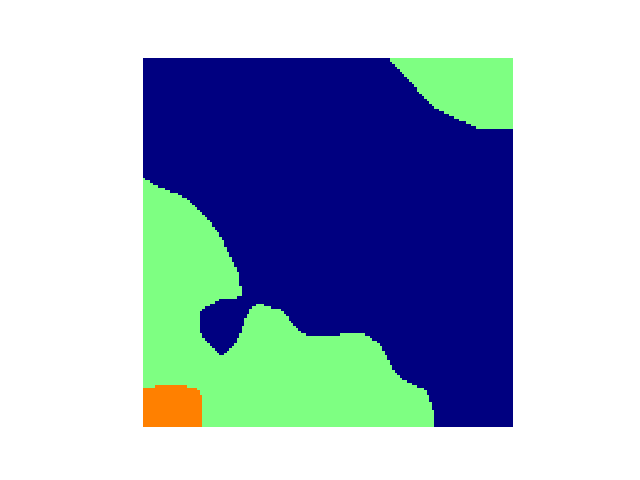

In [7]:
newpredict = predict[0]
print(np.unique(newpredict))

newpredict = np.asarray(newpredict).astype(np.float32)
newpredict[newpredict == 0] = -1
newpredict = ((newpredict+1)*255/4).astype(np.uint8)
newpredict = cv2.applyColorMap(newpredict, cv2.COLORMAP_JET)

b,g,r = cv2.split(newpredict)       # get b,g,r
newpredict = cv2.merge([r,g,b])     # switch it to rgb)
#temp = np.reshape(truth_predict, (truth_predict.shape[0]*truth_predict.shape[1],3))
#colors = np.unique(temp, axis=0)

f, (ax1, ax2, ax3) = plt.subplots(1,3)
ax1.imshow(originalimage)
ax1.set_title('Original')
ax1.axis('off')
ax2.imshow(newpredict)
ax2.set_title('Prediction')
ax2.axis('off')
ax3.imshow(truthimage)
ax3.set_title('Reference')
ax3.axis('off')
plt.show()

plt.figure(2)
plt.imshow(newpredict)
plt.axis('off')
plt.show()